<a href="https://colab.research.google.com/github/SaulHuitzil/Boolean-Networks/blob/main/Node.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [1]:
import random
import math
from typing import List, Dict

## Class

In [2]:
class Node:
    """
    Represents a node with input connections (`Entries`) and a Boolean function (`BF`).
    """

    def __init__(self):
        # List of input connections (indices of connected nodes).
        self.Entries: List[int] = []
        # Boolean function mapping binary input strings to binary outputs.
        self.BF: Dict[str, str] = {}
        # Random number generator for consistent randomness.
        self.random = random.Random()

    def clone(self) -> 'Node':
        """
        Creates a deep copy of the current node, including its entries and Boolean function.
        """
        cloned_node = Node()
        cloned_node.Entries = list(self.Entries)  # Copy the entries.
        cloned_node.BF = dict(self.BF)  # Copy the Boolean function.
        return cloned_node

    def create_entries_with_poisson(self, num_nodes: int, lambda_: float):
        """
        Generates input connections sampled from a Poisson distribution.
        Ensures at least one connection, but no more than `num_nodes - 1`.
        """
        while True:
            num_entries = self.poisson_sample(lambda_)
            num_entries = min(num_entries, num_nodes - 1)
            if num_entries >= 1:
                break
        self.Entries = random.sample(range(num_nodes), num_entries)

    def poisson_sample(self, lambda_: float) -> int:
        """
        Samples from a Poisson distribution with mean `lambda_`.
        """
        L = math.exp(-lambda_)
        p = 1.0
        k = 0
        while True:
            k += 1
            p *= self.random.random()
            if p <= L:
                break
        return k - 1

    def create_entries(self, connectivity: int, num_nodes: int):
        """
        Creates input connections by selecting `connectivity` unique random nodes.
        """
        if connectivity > num_nodes:
            raise ValueError("Connectivity cannot exceed the number of available nodes.")
        self.Entries = random.sample(range(num_nodes), connectivity)

    def create_boolean_function(self):
        """
        Generates a Boolean function (`BF`) for the current inputs.
        Maps all possible binary input configurations to random binary outputs.
        """
        self.BF.clear()  # Ensure the BF is empty before creating a new one.
        connectivity = len(self.Entries)
        total_configurations = 2 ** connectivity
        for i in range(total_configurations):
            key = bin(i)[2:].zfill(connectivity)
            self.BF[key] = str(random.randint(0, 1))

    def add_entry(self, new_entry: int):
        """
        Adds a new input connection and updates the Boolean function to account for it.
        """
        if new_entry in self.Entries:
            raise ValueError(f"Entry {new_entry} is already present in the input list.")
        self.Entries.append(new_entry)
        old_BF = dict(self.BF)
        self.BF.clear()
        for key in old_BF.keys():
            key0 = key + '0'
            key1 = key + '1'
            self.BF[key0] = old_BF[key]
            self.BF[key1] = str(random.randint(0, 1))

    def remove_entry(self, entry: int):
        """
        Removes an input connection and updates the Boolean function to reflect the change.
        """
        if entry not in self.Entries:
            raise ValueError(f"Entry {entry} does not exist in the input list.")
        index = self.Entries.index(entry)
        self.Entries.pop(index)
        self._update_boolean_function_after_removal(index)

    def remove_entry_at(self, position: int):
        """
        Removes the input connection at the specified position and updates the Boolean function.
        """
        if position < 0 or position >= len(self.Entries):
            raise IndexError(f"Position {position} is out of range for the entries list.")
        self.Entries.pop(position)
        self._update_boolean_function_after_removal(position)

    def _update_boolean_function_after_removal(self, removed_index: int):
        """
        Updates the Boolean function after removing an input connection at the given index.
        """
        new_BF = {}
        for config in self.BF.keys():
            if config[removed_index] == '0':
                # Remove the bit at `removed_index` from the configuration.
                new_key = config[:removed_index] + config[removed_index + 1:]
                new_BF[new_key] = self.BF[config]
        self.BF = new_BF





## Tests

=== Test: Create Entries with Poisson ===
Entries: [7, 2]

=== Test: Create Boolean Function ===
Boolean Function: {'00': '1', '01': '1', '10': '0', '11': '1'}

=== Test: Add Entry ===
Entries After Adding: [7, 2, 5]
Boolean Function After Adding: {'000': '1', '001': '1', '010': '1', '011': '0', '100': '0', '101': '0', '110': '1', '111': '0'}

=== Test: Remove Entry ===
Entries After Removing: [7, 2]
Boolean Function After Removing: {'00': '1', '01': '1', '10': '0', '11': '1'}

=== Test: Remove Entry at Position ===
Initial Entries: [3, 5, 6, 8, 4]
Entries After Removing at Position 2: [3, 5, 8, 4]
Boolean Function After Removing at Position 2: {'0000': '1', '0001': '0', '0010': '0', '0011': '0', '0100': '0', '0101': '0', '0110': '1', '0111': '1', '1000': '1', '1001': '0', '1010': '0', '1011': '1', '1100': '0', '1101': '1', '1110': '0', '1111': '1'}


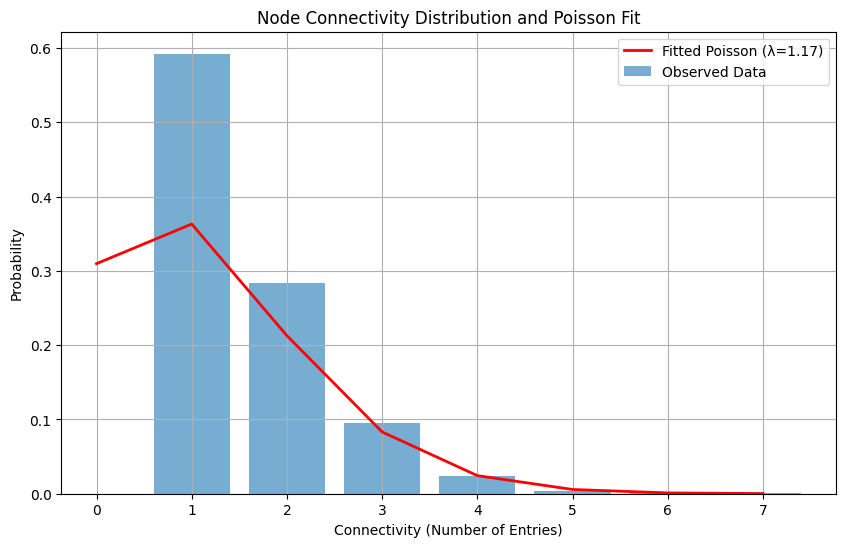

Fitted λ: 1.17
R²: 0.8062
Average Connectivity: 1.57
=- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- 


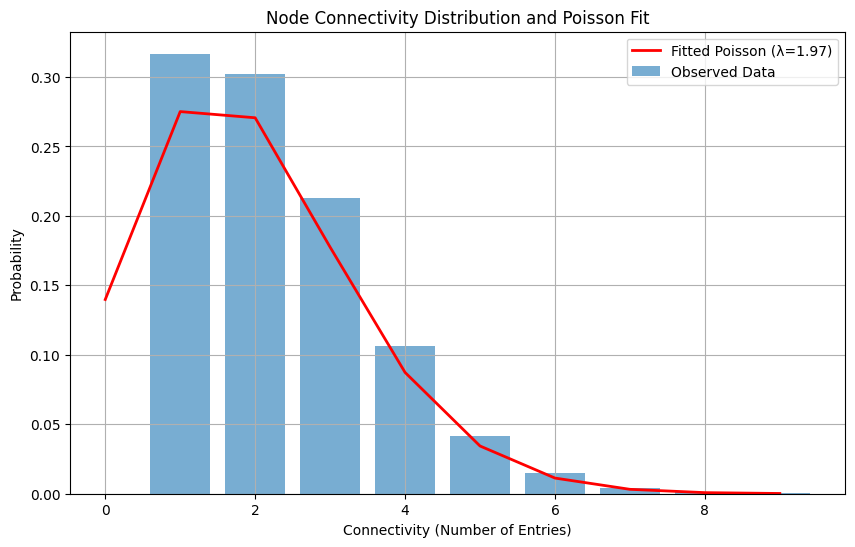

Fitted λ: 1.97
R²: 0.9682
Average Connectivity: 2.32
=- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- 


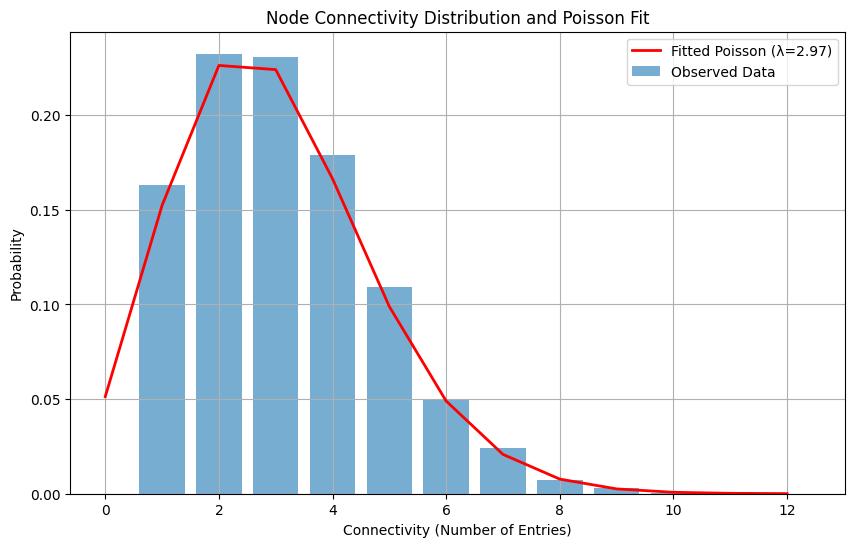

Fitted λ: 2.97
R²: 0.9951
Average Connectivity: 3.15
=- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- 


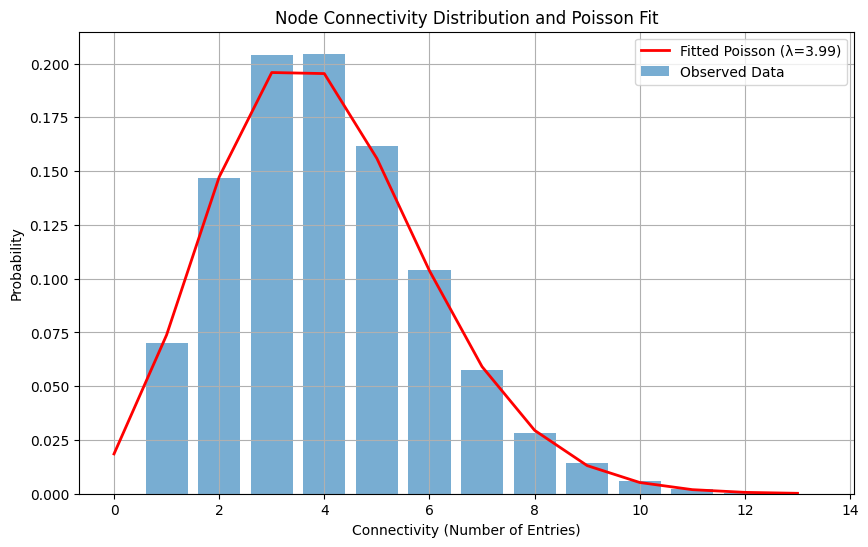

Fitted λ: 3.99
R²: 0.9972
Average Connectivity: 4.07
=- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- 


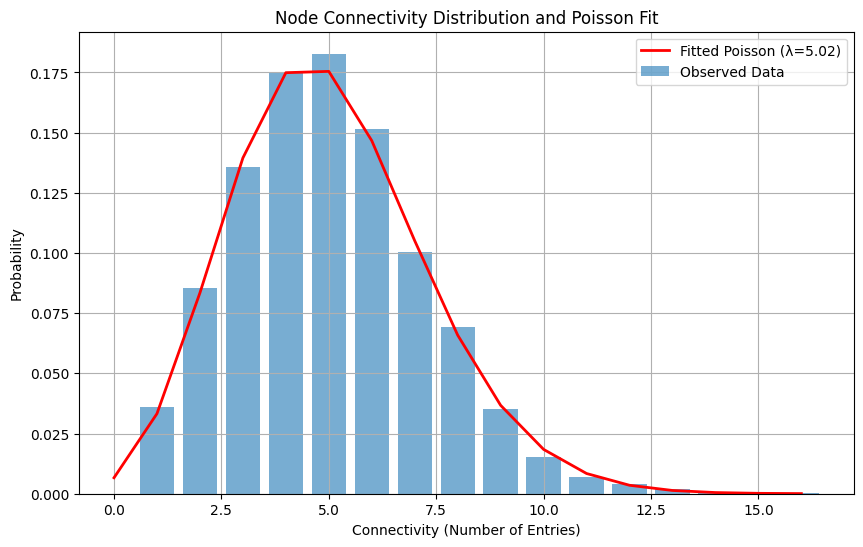

Fitted λ: 5.02
R²: 0.9978
Average Connectivity: 5.02
=- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- =- 


In [3]:
# Unit tests to verify the functionality of the Node class.
if __name__ == "__main__":
    node = Node()

    print("=== Test: Create Entries with Poisson ===")
    node.create_entries_with_poisson(num_nodes=10, lambda_=3.0)
    print(f"Entries: {node.Entries}")

    print("\n=== Test: Create Boolean Function ===")
    node.create_boolean_function()
    print(f"Boolean Function: {node.BF}")

    print("\n=== Test: Add Entry ===")
    try:
        node.add_entry(5)
        print(f"Entries After Adding: {node.Entries}")
        print(f"Boolean Function After Adding: {node.BF}")
    except ValueError as e:
        print(e)

    print("\n=== Test: Remove Entry ===")
    try:
        node.remove_entry(5)
        print(f"Entries After Removing: {node.Entries}")
        print(f"Boolean Function After Removing: {node.BF}")
    except ValueError as e:
        print(e)

    print("\n=== Test: Remove Entry at Position ===")
    node.create_entries(5, 10)  # Create 5 random entries.
    print(f"Initial Entries: {node.Entries}")
    node.create_boolean_function()
    node.remove_entry_at(2)
    print(f"Entries After Removing at Position 2: {node.Entries}")
    print(f"Boolean Function After Removing at Position 2: {node.BF}")

    from scipy.optimize import curve_fit
    from sklearn.metrics import r2_score
    from scipy.stats import poisson
    import numpy as np
    import matplotlib.pyplot as plt

    def poisson_pmf(k, mu):
        """
        Poisson probability mass function (PMF) for curve fitting.
        :param k: Input values (e.g., number of entries).
        :param mu: Mean of the Poisson distribution.
        :return: PMF values for the input `k`.
        """
        return poisson.pmf(k, mu)

    def generate_nodes_and_test_poisson_with_r2(lambda_, num_nodes):
        """
        Generate nodes with entries based on the `create_entries_with_poisson` function,
        and test the distribution of connectivity against a Poisson distribution, including R².

        :param lambda_: Mean of the Poisson distribution.
        :param num_nodes: Total number of nodes to generate.
        """
        # Generate nodes and their connectivity
        connectivities = []
        for _ in range(num_nodes):
            node = Node()
            node.create_entries_with_poisson(num_nodes, lambda_)
            connectivities.append(len(node.Entries))

        # Calculate the frequency distribution of connectivities
        unique, counts = np.unique(connectivities, return_counts=True)
        frequencies = counts / num_nodes

        # Fit the data to a Poisson distribution
        popt, pcov = curve_fit(poisson_pmf, unique, frequencies, p0=[lambda_])
        fitted_lambda = popt[0]

        # Generate Poisson PMF values for the observed data points
        fitted_pmf = poisson.pmf(unique, fitted_lambda)

        # Calculate R² for the fit
        r2 = r2_score(frequencies, fitted_pmf)

        # Calculate the average connectivity
        avg_connectivity = np.mean(connectivities)

        # Plot the observed data and the fitted Poisson distribution
        x = np.arange(0, max(connectivities) + 1)
        y_fit = poisson.pmf(x, fitted_lambda)

        plt.figure(figsize=(10, 6))
        plt.bar(unique, frequencies, width=0.8, alpha=0.6, label="Observed Data", align="center")
        plt.plot(x, y_fit, 'r-', label=f"Fitted Poisson (λ={fitted_lambda:.2f})", linewidth=2)
        plt.title("Node Connectivity Distribution and Poisson Fit")
        plt.xlabel("Connectivity (Number of Entries)")
        plt.ylabel("Probability")
        plt.legend()
        plt.grid(True)
        plt.show()

        return fitted_lambda, r2, avg_connectivity

    def Test_poisson():
      # Parameters for the test
      for lambda_ in [1.0, 2.0, 3.0, 4.0, 5.0]:
        num_nodes = 10000  # Total number of nodes

        # Run the test and return results
        fitted_lambda, r2, avg_connectivity = generate_nodes_and_test_poisson_with_r2(lambda_=lambda_, num_nodes=num_nodes)

        # Display results
        print(f"Fitted λ: {fitted_lambda:.2f}")
        print(f"R²: {r2:.4f}")
        print(f"Average Connectivity: {avg_connectivity:.2f}")

        print(30*"=- ")

    Test_poisson()